In [18]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot
from matplotlib.pyplot import figure

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Glove

In [2]:
root_path = "/content/drive/My Drive/glove.6B.50d.txt"
embeddings_index={}
f = open(root_path, encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
words = list(embeddings_index.keys())[30:50]
V = list(embeddings_index.values())[30:50]

## PCA

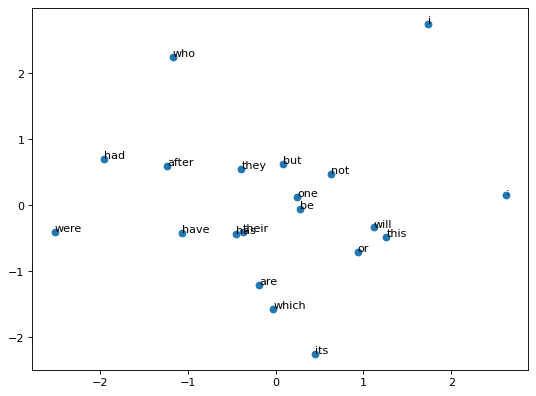

In [4]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

pca = PCA(n_components=2)
result = pca.fit_transform(V)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## TSNE

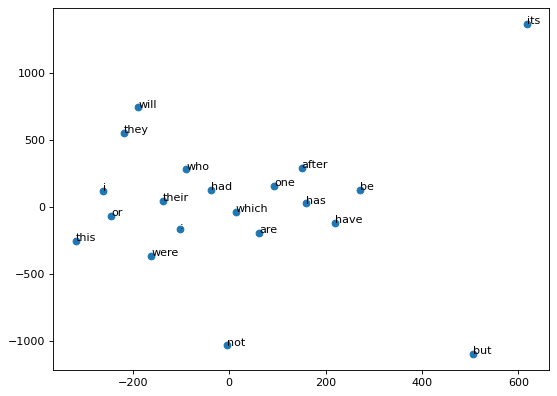

In [5]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

tsne = TSNE(n_components=2 ,n_iter=300, perplexity=40, init='pca')
result = tsne.fit_transform(V)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

##Cosine Similarity

In [0]:
from scipy.spatial.distance import cosine

In [0]:
def find_similar_word(word):
  words = list(embeddings_index.keys())
  if word in embeddings_index:
    prim_vect = embeddings_index[word.lower()]
    cosines = [round(1-cosine(i,prim_vect),3) for i in embeddings_index.values()]
    dictionary = dict(zip(words, cosines))
    sorted_d = sorted((value, key) for (key,value) in dictionary.items())
    sorted_d.reverse()
    return sorted_d[1:11]
  else:
    print("Not in Vocab")

In [8]:
find_similar_word("apple")

[(0.754, 'blackberry'),
 (0.744, 'chips'),
 (0.743, 'iphone'),
 (0.733, 'microsoft'),
 (0.733, 'ipad'),
 (0.722, 'pc'),
 (0.72, 'ipod'),
 (0.719, 'intel'),
 (0.715, 'ibm'),
 (0.709, 'software')]

# SENNA

In [9]:
root_path = "/content/drive/My Drive/SENNA.txt"
embeddings_index={}
f = open(root_path, encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 130000 word vectors.


In [0]:
words = list(embeddings_index.keys())[:20]
V = list(embeddings_index.values())[:20]

## PCA

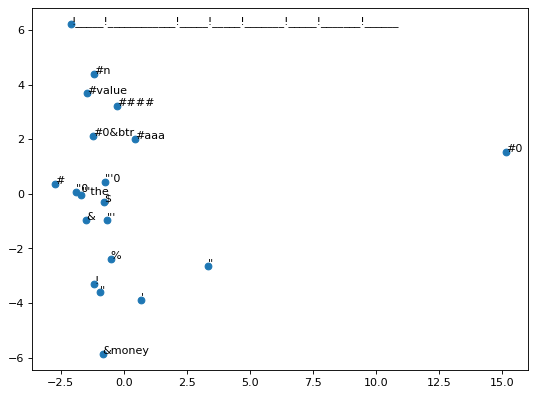

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

pca = PCA(n_components=2)
result = pca.fit_transform(V)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## TSNE

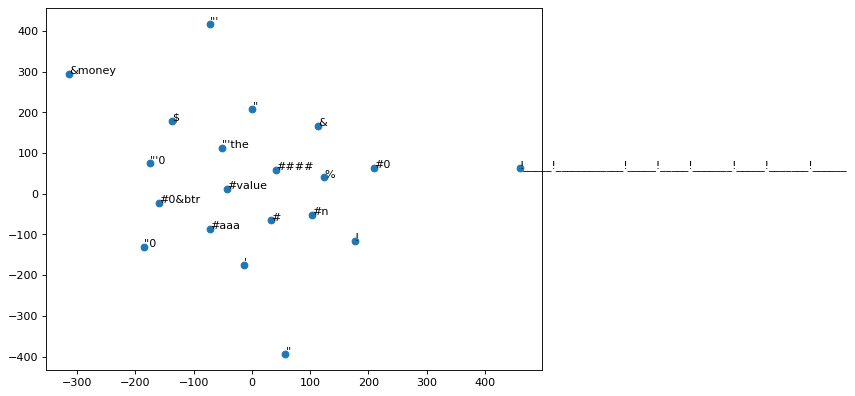

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

tsne = TSNE(n_components=2 ,n_iter=300, perplexity=40, init='pca')
result = tsne.fit_transform(V)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Cosine similarity

In [13]:
find_similar_word("apple")

[(0.596, 'piggy'),
 (0.567, 'chicken'),
 (0.566, 'cookie'),
 (0.561, 'sandwich'),
 (0.561, 'nokia'),
 (0.556, 'spaghetti'),
 (0.551, 'safeway'),
 (0.548, 'peanut'),
 (0.547, 'rye'),
 (0.546, 'pretzel')]

# Custom Word Plot

In [0]:
root_path = "/content/drive/My Drive/glove.6B.50d.txt"
embeddings_index={}
f = open(root_path, encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()


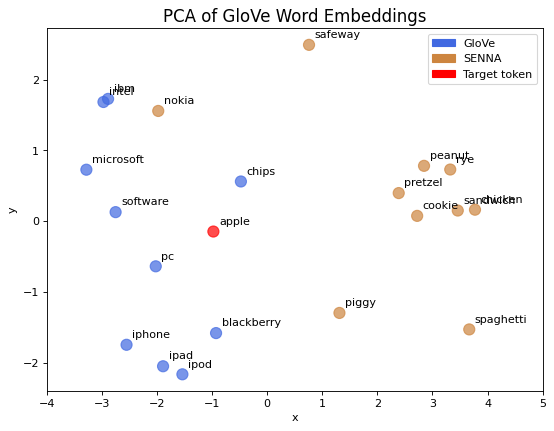

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

words = ["blackberry","chips", "iphone", "microsoft", "ipad", "pc", "ipod", "intel", "ibm", "software", 
           "piggy", "chicken", "cookie", "sandwich", "nokia", "spaghetti", "safeway", "peanut", "rye", "pretzel",
         "apple"]
V = [embeddings_index[i.lower()] for i in words]

pca = PCA(n_components=2)
result = pca.fit_transform(V)


x = result[:, 0]
y = result[:, 1]

categories = [0]*10
categories.extend([1]*10)
categories.extend([2])

colormap = np.array(['royalblue', 'peru', "red"])
figure(num=None, figsize=(8, 6), dpi=80)
plt.scatter(x, y, c=colormap[categories], alpha=0.7, s=100)

adjust = 0.10
for i, word in enumerate(words):
      pyplot.annotate(word, xy=(result[i, 0]+adjust, result[i, 1]+adjust))

pop_a = mpatches.Patch(color='royalblue', label='GloVe')
pop_b = mpatches.Patch(color='peru', label='SENNA')
pop_c = mpatches.Patch(color='red', label='Target token')

plt.legend(handles=[pop_a,pop_b, pop_c])

plt.title("PCA of GloVe Word Embeddings", {'fontsize':15})
plt.xlim(-4, 5)
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('Embeddings.png')
files.download("Embeddings.png")
plt.show()